![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).

## Problem Statement:
### Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
    The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

### INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

### OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

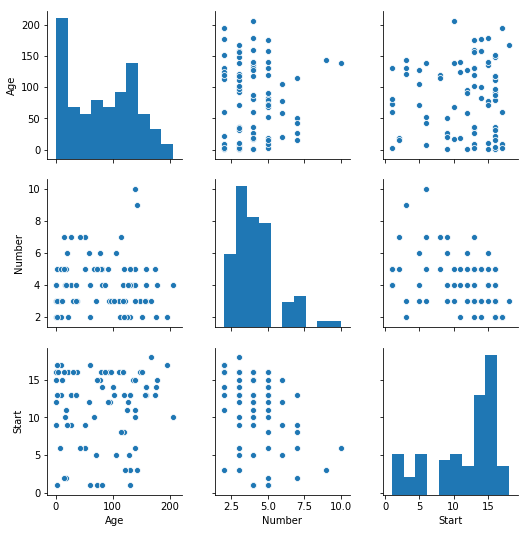

In [4]:
sns.pairplot(data)

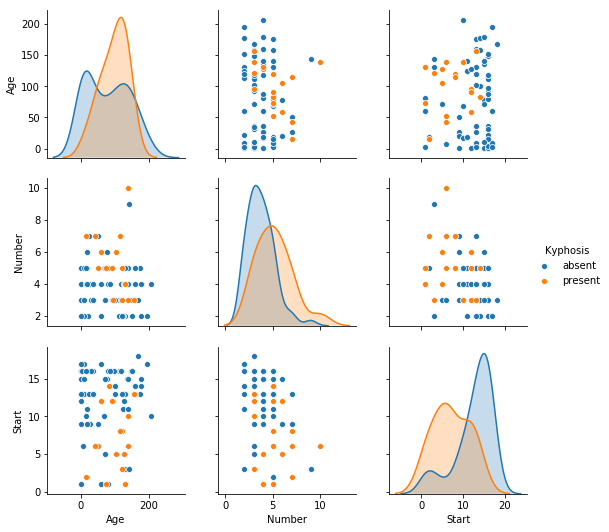

In [5]:
sns.pairplot(data, hue='Kyphosis')

In [6]:
#Splitting the data set into Input and Output
#X = data.iloc[:, 1:]
X= data.drop('Kyphosis', axis=1)
y= data.Kyphosis

In [7]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initailization of object
dtree = DecisionTreeClassifier(criterion='entropy')

# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

dtree.fit(X,y) #Model will be built on all the 81 records--> but if I want to test the performance of the model, I need some data to test

Accuracy--98%

 New data point--> 50%
 
dtree.fit(X,y)-->prediction I took a single row, on some number of rows 

In [9]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [10]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [11]:
confusion_matrix(y_train, y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

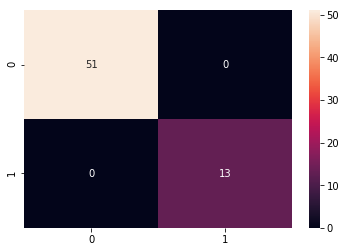

In [12]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [13]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred =  dtree.predict(X_test)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



[Text(167.40000000000003, 205.35999999999999, 'X[2] <= 12.5\nentropy = 0.728\nsamples = 64\nvalue = [51, 13]'),
 Text(133.92000000000002, 181.2, 'X[0] <= 34.5\nentropy = 0.999\nsamples = 27\nvalue = [14, 13]'),
 Text(66.96000000000001, 157.04, 'X[1] <= 6.0\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(33.480000000000004, 132.88, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(100.44000000000001, 132.88, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 157.04, 'X[0] <= 141.0\nentropy = 0.949\nsamples = 19\nvalue = [7, 12]'),
 Text(167.40000000000003, 132.88, 'X[1] <= 5.5\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 83.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(66.96000000000001, 84.56, 'X[0] <= 56.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(33.480000000000004, 60.400000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 60.400000000000006, 'en

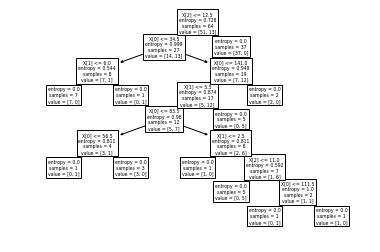

In [14]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
tree.plot_tree(dtree)

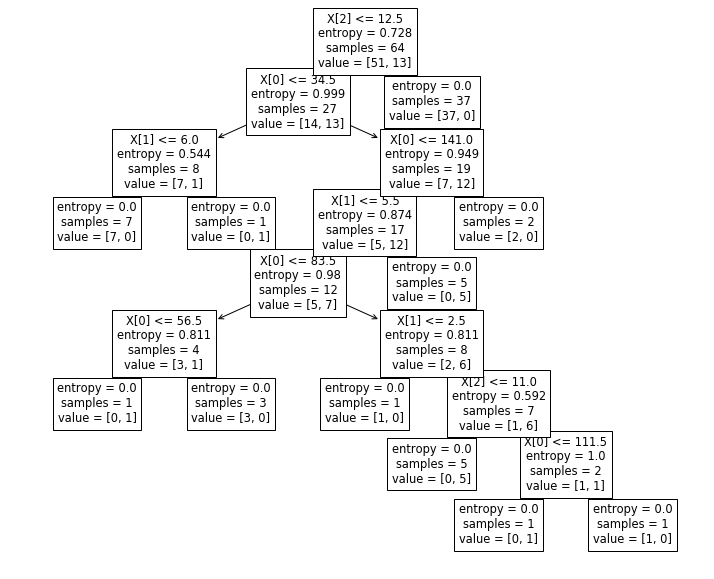

In [15]:
#visualisation of decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [17]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.92307692, 0.76923077, 0.75      ])

In [18]:
#without splitting if we directly built the mode-->we will not able to test

In [19]:
#hyperparameters
# GridSearchCV-->find optimum parameters
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(2,10,1),
           'min_samples_leaf':range(1,10,1)}

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV

#initialisation
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param)

#applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10)})

In [21]:
#returns the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [22]:
#we have to build the model with best parameters
#initialised the DT classifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)

#we need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

### Random Forest Classifier

In [23]:
# Import, initailize and fit
# import rfc from sklearn
from sklearn.ensemble import RandomForestClassifier
#initaize the object for rfc 
rfc= RandomForestClassifier(n_estimators=40)
#fit the rfc to the dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [24]:
## Predictions on training data
#syntax:objectname.predict(InputValues)
y_pred_train=rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [25]:
## Predictions on test data(unseen data)
y_pred_test=rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [26]:
#CrossValidationScore
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8743589743589745